 Develop a program to Load a dataset and select one
 numerical column. Compute mean, median, mode, standard
 deviation, variance, and range for a given numerical column
 in a dataset. Generate a histogram and boxplot to
 understand the distribution of the data. Identify any
 outliers in the data using IQR. Select a categorical variable
 from a dataset. Compute the frequency of each category
 and display it as a bar chart or pie chart 

 Import Necessary Libraries
 Import all libraries which are required for our analysis, such as Data Loading, Statistical
 analysis, Visualizations, Data Transformations, Merge and Joins, etc.
 Pandas and Numpy have been used for Data Manipulation and numerical Calculations
 Matplotlib and Seaborn have been used for Data visualizations

In [2]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\admin\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [6]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import warnings
 warnings.filterwarnings('ignore')

In [7]:
 # Set random seed for reproducibility
 np.random.seed(42)
 # Generate numerical data with outliers
 numerical_data = np.random.randint(20, 80, size=95).tolist()
 outliers = [150, 160, 170, 5, 10]  # Extreme values as outliers
 numerical_data.extend(outliers)
 # Generate categorical data
 categories = ['A', 'B', 'C', 'D']
 categorical_data = np.random.choice(categories, size=100)
 # Create DataFrame
 df = pd.DataFrame({
    'numerical_column': numerical_data,
    'categorical_column': categorical_data
 })
 # Display the first few rows
 print(df.head())
 # Save the dataset to CSV (optional)
 df.to_csv('Sample_Data.csv', index=False)

   numerical_column categorical_column
0                58                  B
1                71                  C
2                48                  D
3                34                  C
4                62                  D


In [8]:
df.head()

,numerical_column,categorical_column
0,58,B
1,71,C
2,48,D
3,34,C
4,62,D


In [9]:
df.shape

(100, 2)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   numerical_column    100 non-null    int64 
 1   categorical_column  100 non-null    object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [11]:
df.nunique()

numerical_column      55
categorical_column     4
dtype: int64

## Data Cleaning

In [12]:
df.isnull().sum()

numerical_column      0
categorical_column    0
dtype: int64

In [13]:
df.duplicated().sum()

np.int64(20)

## Statistical Measures for Numerical Data


In [15]:
num_col = df.select_dtypes(include=[np.number]).columns
cat_col = df.select_dtypes(include=['object']).columns
print(f"numerical_data {num_col}")
print(f"categorical_data {cat_col}")

numerical_data Index(['numerical_column'], dtype='object')
categorical_data Index(['categorical_column'], dtype='object')


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
numerical_column,100.0,52.42,26.663326,5.0,34.0,48.5,66.5,170.0


In [17]:
 # Compute statistics
 mean_value = df[num_col].mean()
 median_value = df[num_col].median()
 mode_value = df[num_col].mode()
 std_dev = df[num_col].std()
 variance = df[num_col].var()
 range_value = df[num_col].max() - df[num_col].min()
 # Print statistics
 print(f"Mean: {mean_value}")
 print(f"Median: {median_value}")
 print(f"Mode: {mode_value}")
 print(f"Standard Deviation: {std_dev}")
 print(f"Variance: {variance}")
 print(f"Range: {range_value}")

Mean: numerical_column    52.42
dtype: float64
Median: numerical_column    48.5
dtype: float64
Mode:    numerical_column
0                63
Standard Deviation: numerical_column    26.663326
dtype: float64
Variance: numerical_column    710.932929
dtype: float64
Range: numerical_column    165
dtype: int64


## Data Visualization for Numerical Data

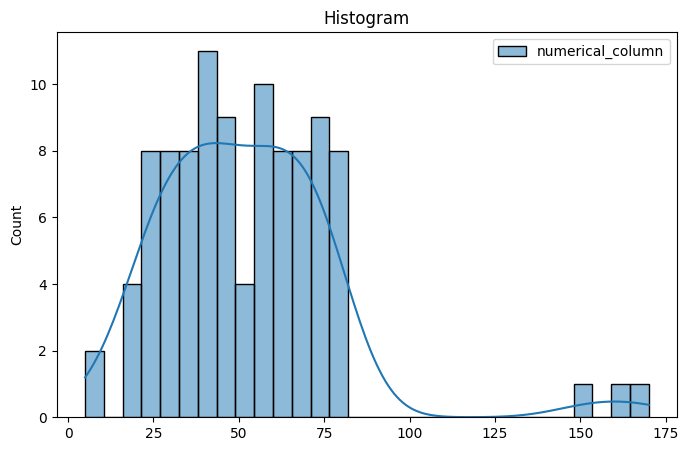

In [18]:
 # Histogram
 plt.figure(figsize=(8,5))
 sns.histplot(df[num_col], bins=30, kde=True)
 plt.title('Histogram')
 plt.show()

In [19]:
 # Inference about the histogram chart
 print("Inference about the histogram chart:")
 print("1. The histogram shows the distribution of the numerical column in the dataset ")
 print("2.  The data appears to be roughly normally distributed with a peak around the 40-60 range.")
 print("3. There are a few extreme values (outliers) on the right side of the histogram, indicating the presence of high-value outliers.")
 print("4. The presence of outliers can be confirmed by the long tail on the right side of the histogram.")
 print("5. The KDE (Kernel Density Estimate) line provides a smooth estimate of the data distribution, highlighting the central tendency and spread of the data")

Inference about the histogram chart:
1. The histogram shows the distribution of the numerical column in the dataset 
2.  The data appears to be roughly normally distributed with a peak around the 40-60 range.
3. There are a few extreme values (outliers) on the right side of the histogram, indicating the presence of high-value outliers.
4. The presence of outliers can be confirmed by the long tail on the right side of the histogram.
5. The KDE (Kernel Density Estimate) line provides a smooth estimate of the data distribution, highlighting the central tendency and spread of the data


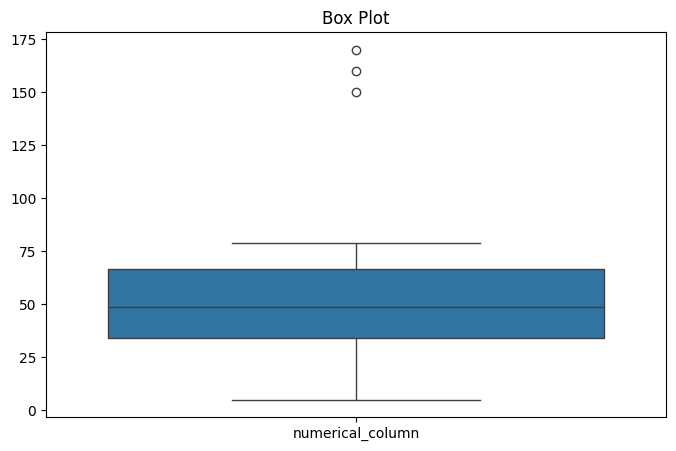

In [21]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(df[num_col])
plt.title('Box Plot')
plt.show()

print("""Inference about the box plot chart:
1. The box plot shows the distribution of the numerical column in the dataset.
2. The central box represents the interquartile range (IQR), which contains the middle 50% of the data.
3. The line inside the box indicates the median value of the numerical column.
4. The whiskers extend to the minimum and maximum values within 1.5 * IQR from the lower and upper quartiles, respectively.
5. Data points outside the whiskers are considered outliers, which are represented as individual points.
6. The presence of several outliers is evident, with values significantly higher than the upper whisker.
7. The distribution appears to be slightly right-skewed, as indicated by the longer whisker and more outliers on the higher end.""")

## Identifying Outliers using IQR

In [25]:
 Q1 = df['numerical_column'].quantile(0.25)
 Q3 = df['numerical_column'].quantile(0.75)
 IQR = Q3 - Q1
 lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
 # Filtering out the outliers
 outliers = df[(df['numerical_column'] < lower_bound) | 
(df['numerical_column'] > upper_bound)]['numerical_column']
 # Print the detected outliers
 print("Outliers:\n", outliers)

Outliers:
 95    150
96    160
97    170
Name: numerical_column, dtype: int64


## Analyzing Categorical Variables

In [27]:
category_counts = df[cat_col].value_counts()
print(category_counts)

categorical_column
C                     31
A                     28
D                     26
B                     15
Name: count, dtype: int64


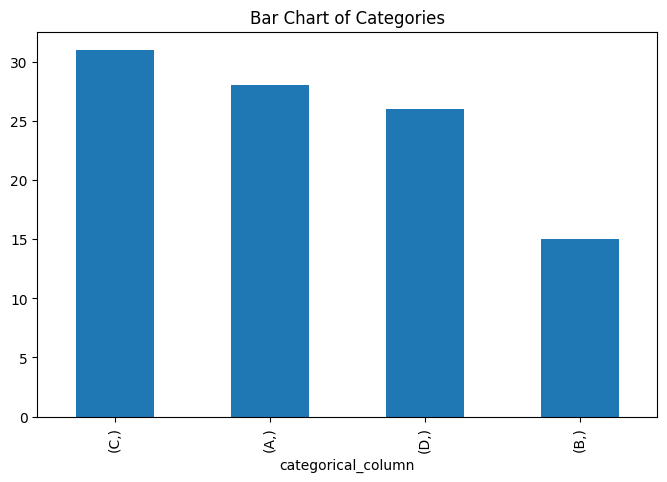

In [28]:
 # Bar Chart
 plt.figure(figsize=(8,5))
 category_counts.plot(kind='bar')
 plt.title('Bar Chart of Categories')
 plt.show()

In [29]:
print("""Inference about the bar chart of categories:
1. The bar chart shows the frequency distribution of the categorical column in the dataset.
2. Category 'C' has the highest frequency with 31 occurrences.
3. Category 'A' follows with 28 occurrences.
4. Category 'D' has 26 occurrences.
5. Category 'B' has the lowest frequency with 15 occurrences.
6. The chart helps in understanding the distribution and dominance of each category in the dataset.""")

Inference about the bar chart of categories:
1. The bar chart shows the frequency distribution of the categorical column in the dataset.
2. Category 'C' has the highest frequency with 31 occurrences.
3. Category 'A' follows with 28 occurrences.
4. Category 'D' has 26 occurrences.
5. Category 'B' has the lowest frequency with 15 occurrences.
6. The chart helps in understanding the distribution and dominance of each category in the dataset.


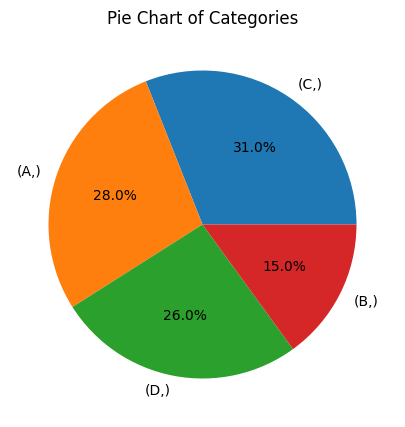

In [30]:
 # Pie Chart
 plt.figure(figsize=(8,5))
 category_counts.plot(kind='pie', autopct='%1.1f%%')
 plt.title('Pie Chart of Categories')
 plt.ylabel('')
 plt.show()

In [31]:
print("""Inference about the pie chart of categories:
1. The pie chart shows the proportion of each category in the categorical column.
2. Category 'C' has the largest proportion, making up 31% of the data.
3. Category 'A' follows with 28% of the data.
4. Category 'D' accounts for 26% of the data.
5. Category 'B' has the smallest proportion, making up 15% of the data.
6. The pie chart provides a clear visual representation of the relative distribution of each category in the dataset.""")

Inference about the pie chart of categories:
1. The pie chart shows the proportion of each category in the categorical column.
2. Category 'C' has the largest proportion, making up 31% of the data.
3. Category 'A' follows with 28% of the data.
4. Category 'D' accounts for 26% of the data.
5. Category 'B' has the smallest proportion, making up 15% of the data.
6. The pie chart provides a clear visual representation of the relative distribution of each category in the dataset.
